# OSZTYN

### BASIC STATS

In [2]:
import os
import subprocess

# prepering directories
path = os.getcwd()
# subfolders
input_dir = os.path.join(path, 'inputs')
output_dir = os.path.join(path, 'outputs')

# open folder
subprocess.Popen(f'explorer "{output_dir}"')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
from matplotlib.lines import Line2D
from matplotlib.dates import DateFormatter

import seaborn as sns

# to supres Pandas warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use("fivethirtyeight")


Bad key "text.kerning_factor" on line 4 in
C:\Users\Ukasz\Anaconda3\envs\geopandas\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
# current the current color palette
print(sns.color_palette().as_hex())
sns.color_palette()

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']


[(0.0, 0.5607843137254902, 0.8352941176470589),
 (0.9882352941176471, 0.30980392156862746, 0.18823529411764706),
 (0.8980392156862745, 0.6823529411764706, 0.2196078431372549),
 (0.42745098039215684, 0.5647058823529412, 0.30980392156862746),
 (0.5450980392156862, 0.5450980392156862, 0.5450980392156862),
 (0.5058823529411764, 0.058823529411764705, 0.48627450980392156)]

In [4]:
data = pd.read_csv(os.path.join(os.getcwd(), 'outputs', 'olsztyn_page_all_pages_20240106151418.csv'))

In [5]:
data.shape

(749, 8)

In [6]:
data.head(1)

,free_text,address,price,price_meter,rooms,area,more,add_link
0,Apartament Premium nad jeziorem Olsztyn Mazury,"Mieszkanie na sprzedaż: Olimpijska 21, Likusy,...",459 000 zł,16 393 zł/m²,2 pokoje,28 m²,28 m²,/pl/oferta/apartament-premium-nad-jeziorem-ols...


#### Cleaning the 'price' column

In [7]:
data['price'] = data['price'].str.replace(u'\xa0', u' ')
data['price'] = data['price'].str.replace(' ', '', regex=True)
data['price'] = data['price'].str.replace('zł', '', regex=True)
data['price'] = data['price'].str.replace(',', '.', regex=True)
# drop nan
data = data[data['price'].notna()]
data['price'] = pd.to_numeric(data['price'])

#### Cleaning the 'price_meter' column

In [8]:
data['price_meter'] = data['price_meter'].str.replace(u'\xa0', u' ')
data['price_meter'] = data['price_meter'].str.replace(' ', '', regex=True)
data['price_meter'] = data['price_meter'].str.replace('zł/m²', '', regex=True)
data['price_meter'] = data['price_meter'].str.replace(',', '.', regex=True)
# drop nan
data = data[data['price_meter'].notna()]
data['price_meter'] = pd.to_numeric(data['price_meter'])

#### Cleaning the 'area' column

In [9]:
data['area'] = data['area'].str.replace(u'\xa0', u' ')
data['area'] = data['area'].str.replace(' ', '', regex=True)
data['area'] = data['area'].str.replace('m²', '', regex=True)
data['area'] = data['area'].str.replace(',', '.', regex=True)
# drop nan
data = data[data['area'].notna()]
data['area'] = pd.to_numeric(data['area'])

## DATA BEFORE REMOVING OUTLIERS 
### Price

In [10]:
data['rooms_umber'] = data['rooms'].str.extract('(\d+)').astype(int)
df = data.describe().astype(int)
df

,price,price_meter,area,rooms_umber
count,684,684,684,684
mean,549150,9755,59,2
std,226630,3428,23,0
min,200000,4421,18,1
25%,402250,7544,42,2
50%,501983,8900,56,3
75%,640000,11145,70,3
max,2360000,31053,162,6


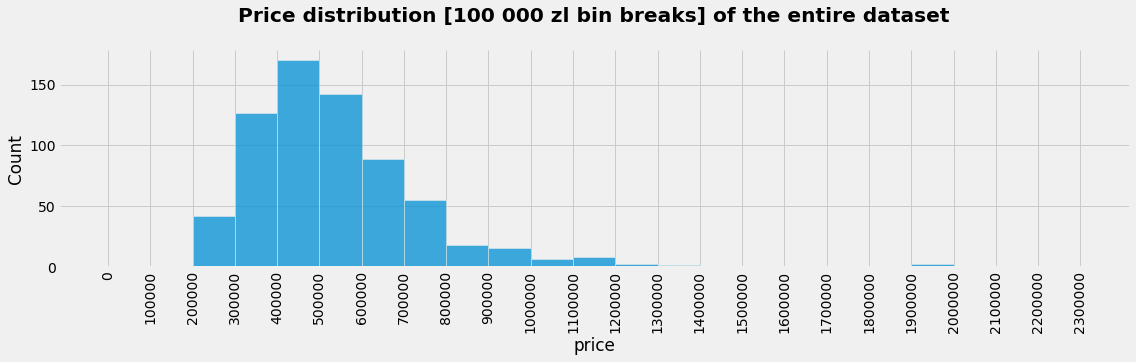

In [11]:
sns.displot(data, x="price", height=4, aspect=4, bins=list(range(0, int(max(data['price'])), 100000)))
plt.xticks(list(range(0, int(max(data['price'])), 100000)), rotation='vertical')
plt.title("Price distribution [100 000 zl bin breaks] of the entire dataset\n", fontweight='bold')
plt.savefig('OLSZTYNprice_distribution.png', bbox_inches='tight')
plt.show()

**Cutting data** - left cut bins

In [12]:
r = range(0, int(max(data['price'])) + 100000, 100000)

data['LCBINS_100k'] = pd.cut(data['price'], r, right=False, labels=False)
def create_label(row):
    return str(row['LCBINS_100k'] * 100) + 'k - ' + str((row['LCBINS_100k'] + 1) * 100) +'k'

data['BINS_100k'] = data.apply(create_label, axis=1)
data.head(3)

,free_text,address,price,price_meter,rooms,area,more,add_link,rooms_umber,LCBINS_100k,BINS_100k
0,Apartament Premium nad jeziorem Olsztyn Mazury,"Mieszkanie na sprzedaż: Olimpijska 21, Likusy,...",459000.0,16393,2 pokoje,28.0,28 m²,/pl/oferta/apartament-premium-nad-jeziorem-ols...,2,4,400k - 500k
1,Przestronne 3pokojowe mieszkanie w Centrum Jarot!,Mieszkanie na sprzedaż: ul. Floriana Piotrowsk...,630000.0,9251,3 pokoje,68.1,Biuro nieruchomości,/pl/oferta/przestronne-3pokojowe-mieszkanie-w-...,3,6,600k - 700k
2,Mieszkanie 3 pokoje Pieczewo Olsztyn,Mieszkanie na sprzedaż: ul. Władysława Gębika ...,549000.0,8318,3 pokoje,66.0,Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-pieczewo-olszty...,3,5,500k - 600k


In [13]:

df = pd.pivot_table(data, 'price','LCBINS_100k', aggfunc=['count', 'min', 'max', 'median', 'mean']).astype(int)
df.sort_index(inplace=True)
df.style.bar(subset=["count"], color='#3ca7db')

,count,min,max,median,mean
,price,price,price,price,price
LCBINS_100k,,,,,
2,42,200000,299997,278500,274664
3,127,300000,399500,369000,362091
4,170,400000,499000,449000,449778
5,142,500000,599000,549250,554193
6,89,601470,699000,649900,653926
7,55,700724,799000,749000,752862
8,18,800000,899000,843009,842253
9,16,900240,999666,953462,954332


#### AREA

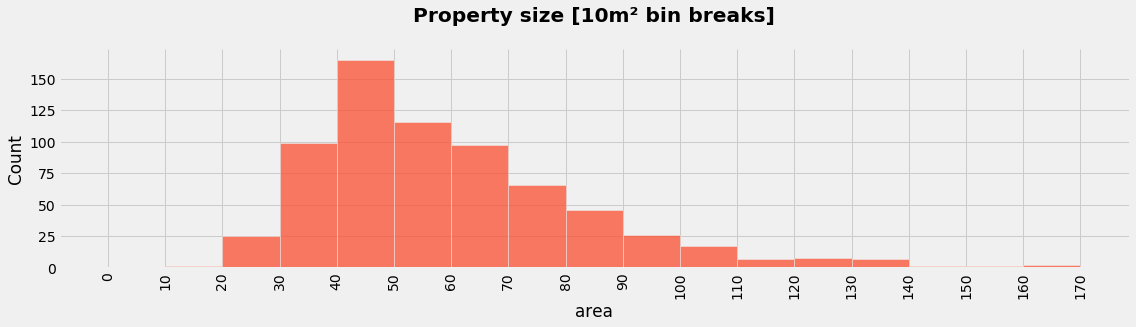

In [14]:
sns.displot(data, x="area", height=4, aspect=4, bins=list(range(0, int(max(data['area'])) + 10, 10)), color='#fc4f30' )
plt.xticks(list(range(0, int(max(data['area'])) + 10 , 10)), rotation='vertical')
plt.title("Property size [10m² bin breaks]\n", fontweight='bold')
plt.savefig('OLSZTYN_size_distribution.png', bbox_inches='tight')
plt.show()

In [15]:
r = range(0, int(max(data['area'])) + 10, 10)

data['LCBINS_10'] = pd.cut(data['area'], r, right=False, labels=False)
def create_label(row):
    return str(row['LCBINS_10'] * 10) + ' - ' + str((row['LCBINS_10'] + 1) * 10) + 'm²'

data['BINS_10'] = data.apply(create_label, axis=1)
data.head(3)

,free_text,address,price,price_meter,rooms,area,more,add_link,rooms_umber,LCBINS_100k,BINS_100k,LCBINS_10,BINS_10
0,Apartament Premium nad jeziorem Olsztyn Mazury,"Mieszkanie na sprzedaż: Olimpijska 21, Likusy,...",459000.0,16393,2 pokoje,28.0,28 m²,/pl/oferta/apartament-premium-nad-jeziorem-ols...,2,4,400k - 500k,2,20 - 30m²
1,Przestronne 3pokojowe mieszkanie w Centrum Jarot!,Mieszkanie na sprzedaż: ul. Floriana Piotrowsk...,630000.0,9251,3 pokoje,68.1,Biuro nieruchomości,/pl/oferta/przestronne-3pokojowe-mieszkanie-w-...,3,6,600k - 700k,6,60 - 70m²
2,Mieszkanie 3 pokoje Pieczewo Olsztyn,Mieszkanie na sprzedaż: ul. Władysława Gębika ...,549000.0,8318,3 pokoje,66.0,Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-pieczewo-olszty...,3,5,500k - 600k,6,60 - 70m²


In [16]:
# create dictionary
values = data[['LCBINS_10', 'BINS_10']]
values = values.drop_duplicates(subset=['LCBINS_10'], keep='first').sort_values(by=['LCBINS_10'], ascending=True) 
d = pd.Series(values['BINS_10'].values,index=values['LCBINS_10']).to_dict()

df = pd.pivot_table(data, 'area','LCBINS_10', aggfunc=['count', 'min', 'max', 'median', 'mean']).astype(int)
df.sort_index(inplace=True)

df.index = [ d[k] for k in list(df.index)]
df.style.bar(subset=["count"], color='#fc4f30')

,count,min,max,median,mean
,area,area,area,area,area
10 - 20m²,1,18,18,18,18
20 - 30m²,25,20,29,28,26
30 - 40m²,99,30,39,36,35
40 - 50m²,165,40,49,44,44
50 - 60m²,116,50,59,56,55
60 - 70m²,97,60,69,63,63
70 - 80m²,66,70,79,73,73
80 - 90m²,46,80,89,84,84
90 - 100m²,26,90,99,94,94


### Price per square metre

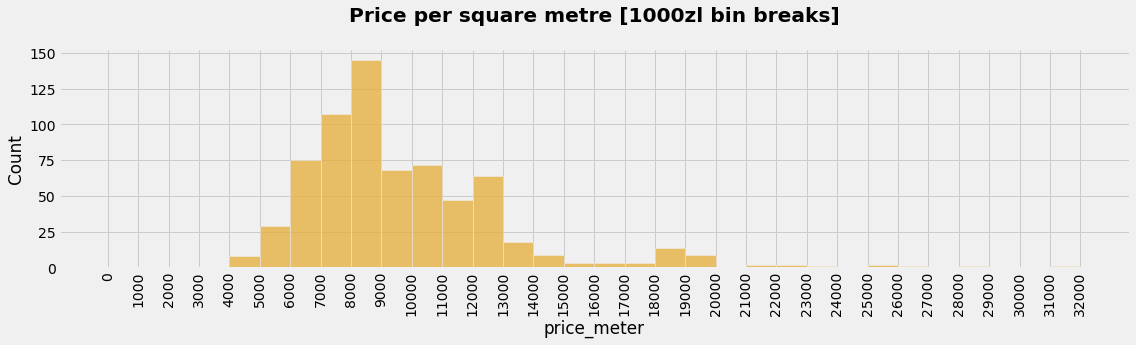

In [17]:
sns.displot(data, x="price_meter", height=4, aspect=4, bins=list(range(0, int(max(data['price_meter'])) + 1000, 1000)), color='#e5ae38' )
plt.xticks(list(range(0, int(max(data['price_meter'])) + 1000 , 1000)), rotation='vertical')
plt.title("Price per square metre [1000zl bin breaks]\n", fontweight='bold')
plt.savefig('OLSZTYN_price_meter_distribution.png', bbox_inches='tight')
plt.show()

In [18]:
r = range(0, int(max(data['price_meter'])) + 1000, 1000)

data['LCBINS_1000SQ'] = pd.cut(data['price_meter'], r, right=False, labels=False)
def create_label(row):
    return str(row['LCBINS_1000SQ'] * 1000) + ' - ' + str((row['LCBINS_1000SQ'] + 1) * 1000) + ' zl/m²'

data['BINS_10SQ'] = data.apply(create_label, axis=1)
data.head(3)

,free_text,address,price,price_meter,rooms,area,more,add_link,rooms_umber,LCBINS_100k,BINS_100k,LCBINS_10,BINS_10,LCBINS_1000SQ,BINS_10SQ
0,Apartament Premium nad jeziorem Olsztyn Mazury,"Mieszkanie na sprzedaż: Olimpijska 21, Likusy,...",459000.0,16393,2 pokoje,28.0,28 m²,/pl/oferta/apartament-premium-nad-jeziorem-ols...,2,4,400k - 500k,2,20 - 30m²,16,16000 - 17000 zl/m²
1,Przestronne 3pokojowe mieszkanie w Centrum Jarot!,Mieszkanie na sprzedaż: ul. Floriana Piotrowsk...,630000.0,9251,3 pokoje,68.1,Biuro nieruchomości,/pl/oferta/przestronne-3pokojowe-mieszkanie-w-...,3,6,600k - 700k,6,60 - 70m²,9,9000 - 10000 zl/m²
2,Mieszkanie 3 pokoje Pieczewo Olsztyn,Mieszkanie na sprzedaż: ul. Władysława Gębika ...,549000.0,8318,3 pokoje,66.0,Biuro nieruchomości,/pl/oferta/mieszkanie-3-pokoje-pieczewo-olszty...,3,5,500k - 600k,6,60 - 70m²,8,8000 - 9000 zl/m²


In [19]:
# create dictionary
values = data[['LCBINS_1000SQ', 'BINS_10SQ']]
values = values.drop_duplicates(subset=['LCBINS_1000SQ'], keep='first').sort_values(by=['LCBINS_1000SQ'], ascending=True) 
d = pd.Series(values['BINS_10SQ'].values,index=values['LCBINS_1000SQ']).to_dict()

df = pd.pivot_table(data, 'price_meter','LCBINS_1000SQ', aggfunc=['count', 'min', 'max', 'median', 'mean']).astype(int)
df.sort_index(inplace=True)

df.index = [ d[k] for k in list(df.index)]
df.style.bar(subset=["count"], color='#e5ae38')

,count,min,max,median,mean
,price_meter,price_meter,price_meter,price_meter,price_meter
4000 - 5000 zl/m²,8,4421,4960,4648,4663
5000 - 6000 zl/m²,29,5020,5975,5706,5609
6000 - 7000 zl/m²,75,6000,6998,6580,6581
7000 - 8000 zl/m²,107,7000,7992,7493,7513
8000 - 9000 zl/m²,145,8000,8999,8534,8541
9000 - 10000 zl/m²,68,9000,9999,9563,9524
10000 - 11000 zl/m²,72,10000,10999,10496,10532
11000 - 12000 zl/m²,47,11000,11999,11442,11411
12000 - 13000 zl/m²,64,12000,12990,12400,12463


### ROOMS number

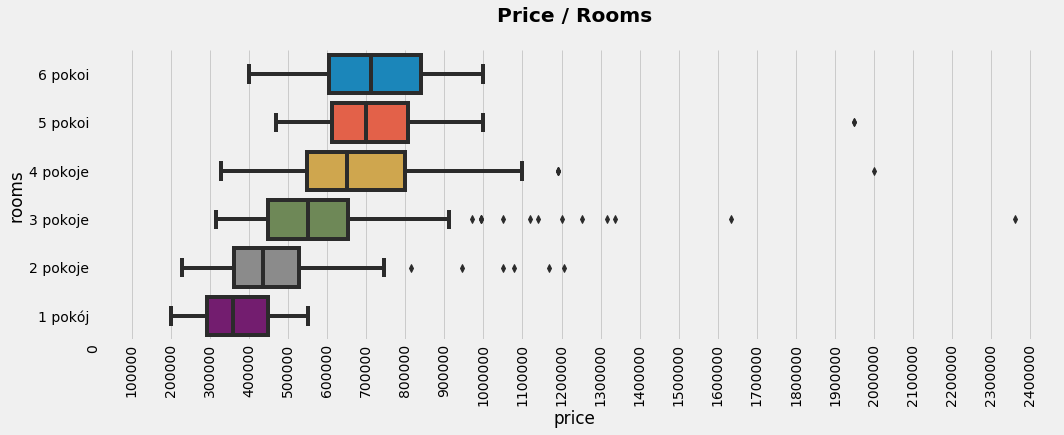

In [20]:
data = data.sort_values(by=['rooms'], ascending=False)  
sns.catplot(data=data, x="price", y="rooms", kind="box", height=5, aspect=3)
plt.xticks(list(range(0, int(max(data['price'])) + 100000, 100000)), rotation='vertical')
plt.title('Price / Rooms\n', fontweight='bold')
plt.savefig('OLSZTYN_rooms_price.png', bbox_inches='tight')
plt.show()

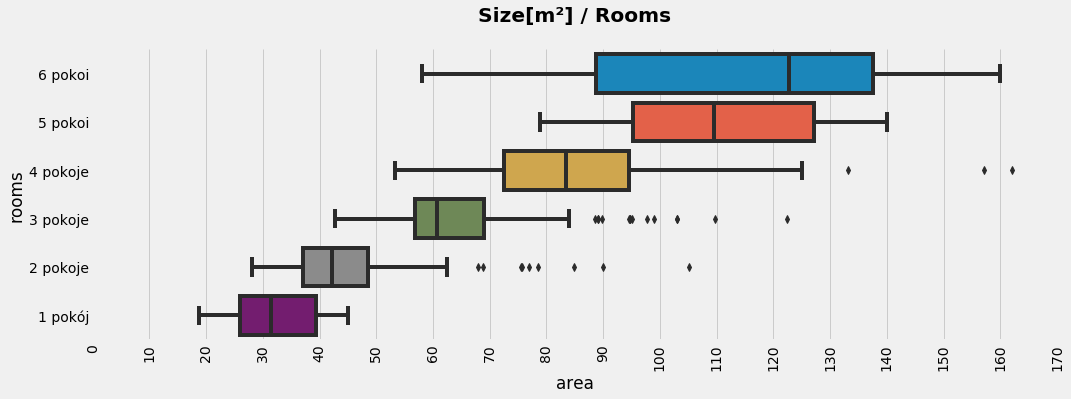

In [21]:
data = data.sort_values(by=['rooms'], ascending=False)  
sns.catplot(data=data, x="area", y="rooms", kind="box", height=5, aspect=3)
plt.xticks(list(range(0, int(max(data['area'])) + 10 , 10)), rotation='vertical')
plt.title('Size[m²] / Rooms\n', fontweight='bold')
plt.savefig('OLSZTYN_rooms_size.png', bbox_inches='tight')
plt.show()

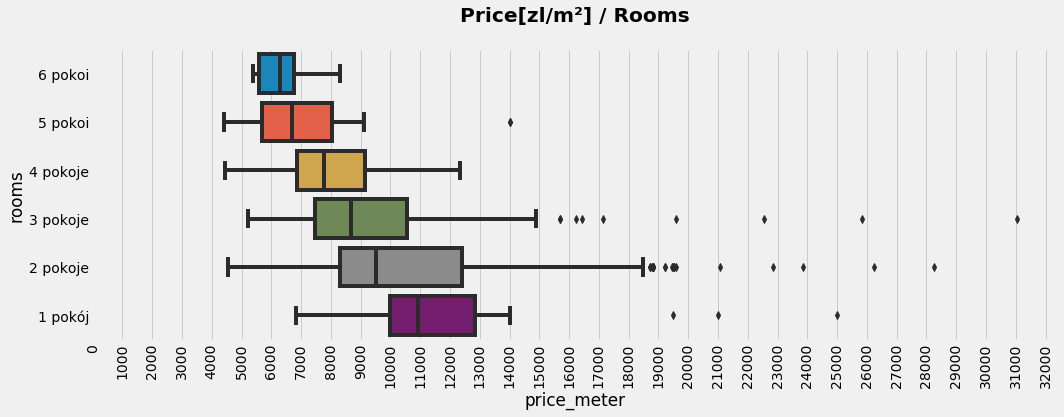

In [22]:
data = data.sort_values(by=['rooms'], ascending=False)  
sns.catplot(data=data, x="price_meter", y="rooms", kind="box", height=5, aspect=3)
plt.xticks(list(range(0, int(max(data['price_meter'])) + 1000 , 1000)), rotation='vertical')
plt.title('Price[zl/m²] / Rooms\n', fontweight='bold')
plt.savefig('OLSZTYN_rooms_price_meter.png', bbox_inches='tight')
plt.show()

In [23]:
data.columns

Index(['free_text', 'address', 'price', 'price_meter', 'rooms', 'area', 'more',
       'add_link', 'rooms_umber', 'LCBINS_100k', 'BINS_100k', 'LCBINS_10',
       'BINS_10', 'LCBINS_1000SQ', 'BINS_10SQ'],
      dtype='object')

In [ ]:
# witH bins 5 years
df = data.copy()
def clean_rok(row):
    if row['Rok budowy'] in ['1', 'Zapytaj', 'inne', '3022']:
        return 'brak informacji'  
    return row['Rok budowy']

df['Rok budowy'] = df.apply(clean_rok, axis=1)
no_data = df.loc[df['year_int'] == 0]
df = df.loc[df['year_int'] != 0]